In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()
import seaborn as sns
import os.path as op

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error#,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from yellowbrick.regressor import ResidualsPlot
#from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
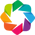

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
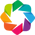

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
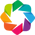

In [3]:
from ta_lib.core.api import display_as_tabs, initialize_environment
import ta_lib.eda.api as eda
# Initialization
initialize_environment(debug=False, hide_warnings=True)
from ta_lib.core.api import create_context, list_datasets, load_dataset

In [4]:
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)
list_datasets(context)

['/raw/search',
 '/raw/product',
 '/raw/sales',
 '/raw/social',
 '/raw/theme',
 '/raw/theme_product',
 '/cleaned/search',
 '/cleaned/product',
 '/cleaned/sales',
 '/cleaned/social',
 '/cleaned/theme',
 '/cleaned/theme_product',
 '/cleaned/sales_demo',
 '/cleaned/sales_master',
 '/cleaned/search_master',
 '/cleaned/social_master',
 '/processed/sales',
 '/train/sales/features',
 '/train/sales/target',
 '/train/sales/train_set',
 '/test/sales/features',
 '/test/sales/target',
 '/test/sales/test_set',
 '/test/sales/test_sample',
 '/score/sales/output']

In [5]:
sales_cleaned=load_dataset(context,  ('cleaned/sales'))
search_cleaned=load_dataset(context, ('cleaned/search'))
product_manufacturer_cleaned=load_dataset(context,('cleaned/product'))
social_media_cleaned=load_dataset(context,('cleaned/social'))
theme_list_cleaned=load_dataset(context,('cleaned/theme'))
theme_product_cleaned=load_dataset(context, ('cleaned/theme_product'))
sales_master=load_dataset(context,('cleaned/sales_demo'))

In [6]:
sum1 = eda.get_variable_summary(search_cleaned)
sum2 = eda.get_variable_summary(product_manufacturer_cleaned)
sum3 = eda.get_variable_summary(sales_cleaned)
sum4 = eda.get_variable_summary(social_media_cleaned)
sum5 = eda.get_variable_summary(theme_list_cleaned)
sum6 = eda.get_variable_summary(theme_product_cleaned)
sum7= eda.get_variable_summary(sales_master)
display_as_tabs([('search',sum1),('product',sum2),('sales',sum3),('social',sum4),
                 ('theme',sum5),('theme_list',sum6),('sales_master',sum7)]) 

Tabs
    [0] DataFrame(name='search', value=               Variable Na...)
    [1] DataFrame(name='product', value=           Variable Name D...)
    [2] DataFrame(name='sales', value=                          ...)
    [3] DataFrame(name='social', value=           Variable Name D...)
    [4] DataFrame(name='theme', value=         Variable Name Dat...)
    [5] DataFrame(name='theme_list', value=           Variable Name D...)
    [6] DataFrame(name='sales_master', value=                          ...)

In [7]:
def theme_name(id):
    return theme_list_cleaned[theme_list_cleaned['theme_id']==id]['theme'].item()

In [8]:
def theme_name_list(list1):
    list2=[]
    for i in list1:
        list2.append(theme_list_cleaned[theme_list_cleaned['theme_id']==i]['theme'].item())
    return list2

## 1. Data Preparation from social media, google search and sales data.



### 1.1.List of all themes
<Details>To get the unique themes around all the datasets, `Setanalyse` is utilised to ensure the presence of all the themes present in `theme_list` dataset

In [9]:
from  ta_lib.core.api import setanalyse
#setanalyse()
a=setanalyse(social_media_cleaned['theme_id'].tolist(),theme_list_cleaned['theme_id'].tolist())
b=setanalyse(search_cleaned['theme_id'].tolist(),theme_list_cleaned['theme_id'].tolist())
print(a,'\n',b)

{'A-B': 0, 'B-A': 15, 'AuB': 208, 'A^B': 193} 
 {'A-B': 0, 'B-A': 48, 'AuB': 208, 'A^B': 160}


In [10]:
pd.DataFrame(theme_list_cleaned['theme'].unique())

0
0         No Claim
1         low carb
2            beans
3            cocoa
4          vanilla
..             ...
203           cola
204     shortbread
205  passion fruit
206   blood orange
207        caramel

[208 rows x 1 columns]

### 1.2.Polpular themes across Datasets

#### Across `Search` Dataset

In [11]:
pop_search=pd.DataFrame(search_cleaned.groupby(['theme_id'])['search_volume'].sum().reset_index())

In [12]:
pd.merge(pop_search.sort_values(by=['search_volume'],ascending=False).head(5),
        theme_list_cleaned,on='theme_id',how='left')

theme_id  search_volume                  theme
0       869      113502487  ethical - environment
1       964       77711760                 shrimp
2       613       74588723             sugar free
3       980       73957180                  honey
4       576       56756609       health (passive)

#### Across `Social` Dataset

In [13]:
pop_social=social_media_cleaned.groupby(['theme_id'])['total_post'].sum().reset_index()

In [14]:
pd.merge(pop_social.sort_values(by=['total_post'],ascending=False).head(5),
        theme_list_cleaned,on='theme_id',how='left')

theme_id  total_post             theme
0       576     5329592  health (passive)
1       670     4609405              boar
2       770     2821690            rabbit
3       668     2462718         probiotic
4       732     2417031           pumpkin

### 1.3 Data Summary Reports

**Reports** of each dataset as follows:

[Search](files/search.html "Search Dataset Summary")

[Social Media](files/social.html 'Social Media Dataset Summary')

[Sales](files/sales.html 'Sales Dataset Summary')

[Product Manufacturer](files/prod.html 'Product Manufacturer Dataset Summary')

[Theme Product](files/theme_list.html 'Theme Product Dataset Summary')

[Theme List](files/theme.html 'Theme List Dataset Summary')

### 1.4 Time granularity

As the **`Sales`** dataset contains the information dated on a weekly basis, **`Weekly`** analyis is chosen at the preliminary stage.

## 2.Data exploration and Hypothesis Validation

 **2.1** Merging the `Product Manufacturer` dataset with `Sales` dataset to grab the **`Vendor`** Information

#### 2.2 Share of `Vendor_A` (Quarterly,Yearly and Overall)

In [15]:
sales_vendor=pd.merge(sales_cleaned,product_manufacturer_cleaned,on='product_id',how='left')

In [16]:
d=pd.DataFrame(sales_vendor.groupby(['vendor','month','year_new'])['sales_dollars_value'].sum()).reset_index()

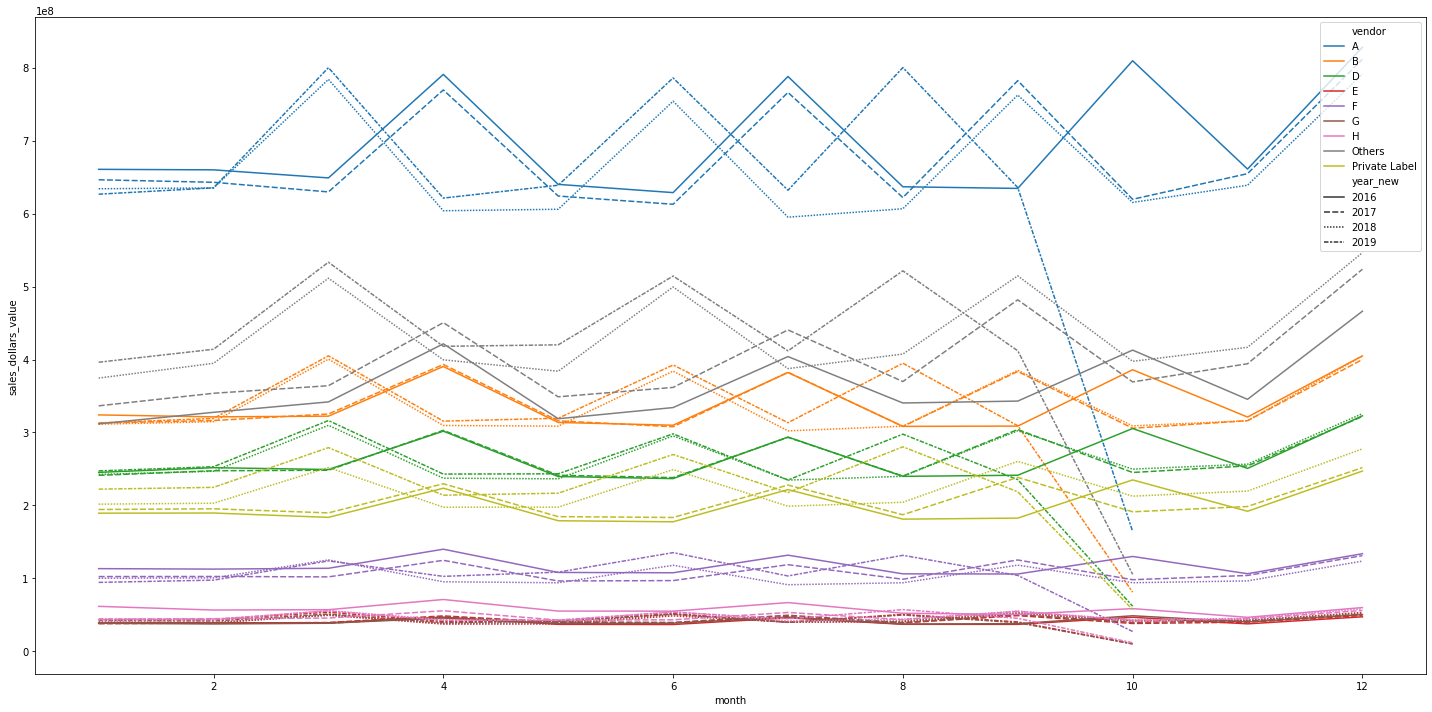

In [44]:
plt.figure(figsize=(20,10))
colors=sns.color_palette("dark")
g = sns.lineplot(x="month", y="sales_dollars_value",style='year_new',
                data=d,hue='vendor',legend='full');
plt.legend(loc='upper right')

<Figure size 2160x1440 with 0 Axes>

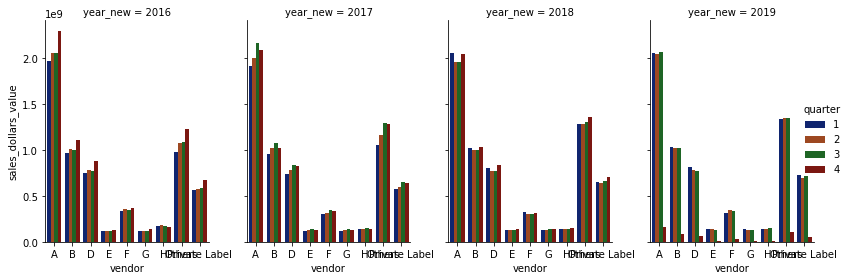

In [17]:
plt.figure(figsize=(30,20))
colors=sns.color_palette("dark")
g = sns.catplot(x="vendor", y="sales_dollars_value",
                hue="quarter", col="year_new",
                data=d, kind="bar",
                height=4, aspect=.7,palette=colors);

In [44]:
e=pd.DataFrame(sales_vendor.groupby(['vendor','month','year_new'])['sales_dollars_value'].sum()).reset_index()

<Figure size 2160x1440 with 0 Axes>

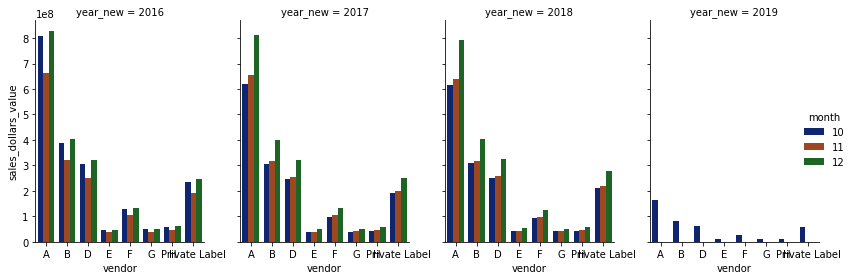

In [48]:
plt.figure(figsize=(30,20))
colors=sns.color_palette("dark")
e1=e[(e['vendor']!='Others') & e['month'].isin([10,11,12])]
g = sns.catplot(x="vendor", y="sales_dollars_value", col="year_new",
                data=e1, kind="bar",hue='month',
                height=4, aspect=.7,palette=colors);

In [51]:
a=pd.DataFrame(sales_vendor.groupby(['vendor'])['sales_dollars_value'].sum()).reset_index()

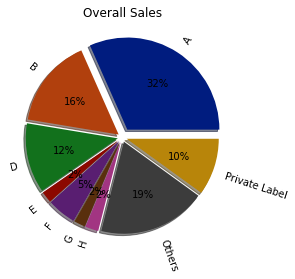

In [52]:
m1=0.05
explode = [0.1, m1,m1, m1,m1,m1,m1,m1,m1]
#colors = sns.color_palette('dark')
plt.pie(a['sales_dollars_value'], labels=a['vendor'], colors=colors,
        autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='true')
plt.title('Overall Sales')
plt.show()

##### Inference
- **Vendor A** is dominant in this market throughout all the years followed by **Vendor B** and **Private Label**.
- **Quarter 4** of **2019** of all the vendor's sales is very low compared to other quarters (might be due to lack of information over that quarter) 

#### 2.3 Theme wise competitors

In [20]:
th=pd.merge(sales_vendor,theme_product_cleaned,how='left',on='product_id')
th=pd.merge(th,theme_list_cleaned,how='left',on='theme_id')

In [21]:
f=pd.DataFrame(th.groupby(['vendor'])['theme'].unique()).reset_index()

In [22]:
A_themes=f['theme'][0]
A_not_data=f[f['vendor']!='A']
A_competitors = {key: None for key in A_themes}
for i in A_themes:
    A_competitors[i]=[]
    for j in range(1,len(A_not_data)+1):
        if i in (A_not_data['theme'][j]):
            A_competitors[i].append(A_not_data['vendor'][j])
A_competitors

{'No Claim': ['B', 'D', 'E', 'F', 'G', 'H', 'Others', 'Private Label'],
 'pollock': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'pizza': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'cookie': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'soy foods': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'apple cinnamon': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'blueberry': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'american southwest style': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'herbs': ['F', 'H', 'Others'],
 'poultry': ['B', 'Others'],
 'salmon': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'ethnic & exotic': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'stroganoff': ['B', 'D', 'F', 'H', 'Others'],
 'no additives/preservatives': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'low carb': ['B', 'D', 'F', 'H', 'Others', 'Private Label'],
 'low sodium': ['B', 'F', 'Others', 'Private Label'],
 'tilapia': ['Others'],
 'gmo free': ['B', 

In [23]:
pd.DataFrame.from_dict(A_competitors, orient ='index')

0       1              2              3  \
No Claim                         B       D              E              F   
pollock                          B       D              F              H   
pizza                            B       D              F              H   
cookie                           B       D              F              H   
soy foods                        B       D              F              H   
apple cinnamon                   B       D              F              H   
blueberry                        B       D              F              H   
american southwest style         B       D              F              H   
herbs                            F       H         Others           None   
poultry                          B  Others           None           None   
salmon                           B       D              F              H   
ethnic & exotic                  B       D              F              H   
stroganoff                       B       D              F              H   
no additives/preservatives       B       D              F              H   
low carb                         B       D              F              H   
low sodium                       B       F         Others  Private Label   
tilapia                     Others    None           None           None   
gmo free                         B       F              H         Others   
french bisque                    B       D              F         Others   
high/source of protein           B  Others           None           None   
chicken                          B       D              F              H   
buckwheat                        B       D              F              H   
crab                             F  Others  Private Label           None   
beef hamburger              Others    None           None           None   
beans                            D  Others  Private Label           None   
gingerbread                      B       D              F              H   
low sugar                        B       H         Others  Private Label   
american gumbo                   B       F              H         Others   
brown ale                        B       H         Others  Private Label   
tuna                          None    None           None           None   
vegetarian                       B       H         Others           None   
ethical - packaging              B       F         Others           None   

                                        4              5       6  \
No Claim                                G              H  Others   
pollock                            Others  Private Label    None   
pizza                              Others  Private Label    None   
cookie                             Others  Private Label    None   
soy foods                          Others  Private Label    None   
apple cinnamon                     Others  Private Label    None   
blueberry                          Others  Private Label    None   
american southwest style           Others  Private Label    None   
herbs                                None           None    None   
poultry                              None           None    None   
salmon                             Others  Private Label    None   
ethnic & exotic                    Others  Private Label    None   
stroganoff                         Others           None    None   
no additives/preservatives         Others  Private Label    None   
low carb                           Others  Private Label    None   
low sodium                           None           None    None   
tilapia                              None           None    None   
gmo free                    Private Label           None    None   
french bisque               Private Label           None    None   
high/source of protein               None           None    None   
chicken                            Others  Private Label    None   
buckwheat                   

#### 2.4 Emerging themes

#### In Search Platforms

In [31]:
search_year=pd.DataFrame(search_cleaned.groupby(['year_new','theme_id'])['search_volume'].sum()).reset_index()
xx=pd.DataFrame(columns=search_year.columns)
for i in set(search_year['year_new']):
    xx=pd.concat([xx,pd.DataFrame(search_year[search_year['year_new']==i].nsmallest(5,'search_volume'))],axis=0)
emerging_years={2018,2019}
previous_years=set(xx['year_new'])-emerging_years
theme_ey=set(xx[xx['year_new'].isin(emerging_years)]['theme_id'])
theme_py=set(xx[xx['year_new'].isin(previous_years)]['theme_id'])
nn=set(xx[(xx['theme_id'].isin(theme_ey)) & ~(xx['theme_id'].isin(theme_py))]['theme_id'])
theme_name_list(nn)

['carob', 'white cheddar cheese', 'peach', 'fruit', 'kale']

#### In Social Media

In [32]:
social_year=pd.DataFrame(social_media_cleaned.groupby(['year_new','theme_id'])['total_post'].sum()).reset_index()
xx=pd.DataFrame(columns=social_year.columns)
for i in set(social_year['year_new']):
    xx=pd.concat([xx,pd.DataFrame(social_year[social_year['year_new']==i].nsmallest(5,'total_post'))],axis=0)
emerging_years={2018,2019}
previous_years=set(xx['year_new'])-emerging_years
theme_ey=set(xx[xx['year_new'].isin(emerging_years)]['theme_id'])
theme_py=set(xx[xx['year_new'].isin(previous_years)]['theme_id'])
nn=set(xx[(xx['theme_id'].isin(theme_ey)) & ~(xx['theme_id'].isin(theme_py))]['theme_id'])
theme_name_list(nn)

['convenience', 'butternut squash']

#### In Sales

In [33]:
sales_year=pd.DataFrame(pd.merge(sales_cleaned,theme_product_cleaned,on='product_id',how='left')
                        .groupby(['year_new','theme_id'])['theme_id'].agg(['count'])).reset_index()
xx=pd.DataFrame(columns=sales_year.columns)
for i in set(sales_year['year_new']):
    xx=pd.concat([xx,pd.DataFrame(sales_year[sales_year['year_new']==i].nsmallest(5,'count'))],axis=0)
emerging_years={2018,2019}
previous_years=set(xx['year_new'])-emerging_years
theme_ey=set(xx[xx['year_new'].isin(emerging_years)]['theme_id'])
theme_py=set(xx[xx['year_new'].isin(previous_years)]['theme_id'])
nn=set(xx[(xx['theme_id'].isin(theme_ey)) & ~(xx['theme_id'].isin(theme_py))]['theme_id'])
theme_name_list(nn)

['ethical - not specific', 'peanut', 'halal']

#### 2.5 Trend Flows

In [27]:
from matplotlib_venn import venn3

In [28]:
theme_sales=set(pd.merge(pd.merge(sales_cleaned,theme_product_cleaned,on='product_id')['theme_id'],theme_list_cleaned,
                         on='theme_id',how='left')['theme'])

theme_search=set(pd.merge(search_cleaned['theme_id'],theme_list_cleaned,
                         on='theme_id',how='left')['theme'])

theme_social=set(pd.merge(social_media_cleaned['theme_id'],theme_list_cleaned,
                         on='theme_id',how='left')['theme'])

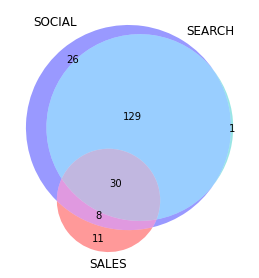

In [29]:
venn3([theme_social,theme_search,theme_sales],set_labels=('SOCIAL', 'SEARCH','SALES'),set_colors=('b', 'c', 'r'))

In [30]:
theme_social.intersection(theme_search,theme_sales)

{'beef hamburger',
 'blueberry',
 'bone health',
 'chicken',
 'convenience - easy-to-prepare',
 'crab',
 'energy/alertness',
 'ethical - not specific',
 'ethical - packaging',
 'ethnic & exotic',
 'french bisque',
 'gingerbread',
 'gmo free',
 'halal',
 'high/source of protein',
 'low calorie',
 'low carb',
 'low sodium',
 'low sugar',
 'mackerel',
 'no additives/preservatives',
 'nuts',
 'peach',
 'poultry',
 'prebiotic',
 'salmon',
 'sea salt',
 'soy foods',
 'tuna',
 'vegetarian'}